## Logistic Regression

A logistic regression classifier built using Python and Numpy to predict university admissions. Each observation contains an individual student's scores on two exams, as well as their admission decision (0 for rejection, 1 for acceptance).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def normalize(X, means=None, stds=None):
    '''Pass in (m x n) dimensional X matrix and normalize each column. Return the
    normalized X matrix and the column means and stdevs for future use.'''
    if means is None and stds is None:
        means = X.mean(axis=0)
        stds = X.std(axis=0)
    X = (X - means) / stds
    return X, means, stds

In [3]:
def sigmoid(z):
    '''Pass matrix z through sigmoid activation function.'''
    return 1 / (1 + np.exp(-z))

In [4]:
def cost(X, y, theta):
    '''Calculate cost for matrix X. X should include x0 column of ones.'''
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    cost = y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))
    j = -1/m * cost
    return j

In [5]:
def gradient_descent(X, y, theta, alpha, iters):
    '''Pass in theta as matrix of zeros. Adjust theta values until the cost
    function is minimized. Return the optimal theta values, as well as the 
    cost value for each iteration.'''
    m = X.shape[0]
    costs = []
    for i in range(iters):
        h = sigmoid(X.dot(theta))            # m x 1
        loss = (h - y)
        gradient = (loss.T.dot(X)) / m
        theta = theta - (alpha * gradient)
        costs.append(cost(X, y, theta))
    return theta, costs

In [6]:
def predict(X, theta):
    '''Pass in numpy array X, with scaled features and bias column. Return
    predicted probabilities and class assignments.
    '''
    z = X.dot(theta)
    probs = sigmoid(z)
    preds = [1 if p >= 0.5 else 0 for p in probs]
    return {'probs': probs, 'preds': np.array(preds)}

In [7]:
def scale_predict(X, means, stdevs, theta):
    '''Pass in X and previously generated feature parameters for scaling. Normalize features and add
    a bias column of ones. Use weights optimized through gradient descent to predict probabilities
    and classes.'''
    X = normalize(X, means, stdevs)[0]
    X = np.column_stack((np.ones(X.shape[0]), X))
    output_dict = predict(X, theta)
    return output_dict

## Load data

In [8]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
print(data[:5,:])
print('\nData dimensions:', data.shape)
print('\nColumn means:\n{}'.format(data.mean(axis=0)))

# Split data into X and y
X = data[:,:-1]
y = data[:,-1]
m, n = X.shape

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]

Data dimensions: (100, 3)

Column means:
[65.64427406 66.22199809  0.6       ]


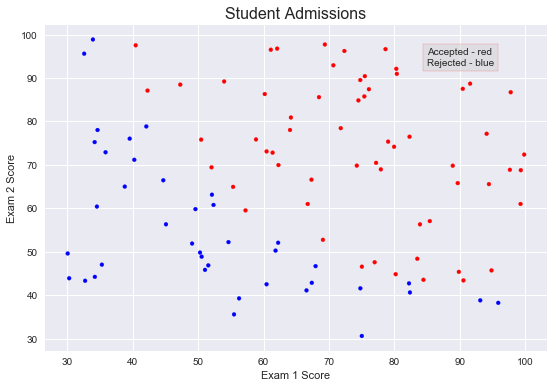

In [9]:
# Quick data visualization
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=15)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Student Admissions', fontsize=16)
plt.text(85,93, 'Accepted - red\nRejected - blue', bbox={'edgecolor': 'red', 
                                                        'facecolor': 'lightgrey',
                                                        'alpha': 0.5})
plt.show()

## Preprocessing

Perform feature scaling on X, using column mean and standard deviation to normalize the data. This should help gradient descent converge more quickly. 

In [10]:
X_scaled, col_means, col_stdevs = normalize(X)
X_scaled = np.column_stack((np.ones(m), X_scaled))
print(X_scaled[:5,:])

[[ 1.         -1.60224763  0.63834112]
 [ 1.         -1.82625564 -1.2075414 ]
 [ 1.         -1.53903969  0.3612943 ]
 [ 1.         -0.28210129  1.0863683 ]
 [ 1.          0.69152826  0.49337794]]


In [11]:
print('Scaling Parameters')
print('\nFeature means:\n{}'.format(col_means))
print('\nFeature standard deviations:\n{}'.format(col_stdevs))

Scaling Parameters

Feature means:
[65.64427406 66.22199809]

Feature standard deviations:
[19.36068671 18.48963567]


## Gradient Descent

In [12]:
iters = 10000
alpha = 0.01
theta = np.zeros(n+1)

initial_cost = cost(X_scaled, y, theta)
print('Cost with intial zero weights:\n{}'.format(initial_cost))

Cost with intial zero weights:
0.6931471805599453


In [13]:
theta_vals, costs = gradient_descent(X_scaled, y, theta, alpha, iters)
print('Weights:\n{}'.format(theta_vals))
print('\nCost:\n{}'.format(costs[-1]))

Weights:
[1.27071379 3.04735849 2.81165934]

Cost:
0.21053844138853486


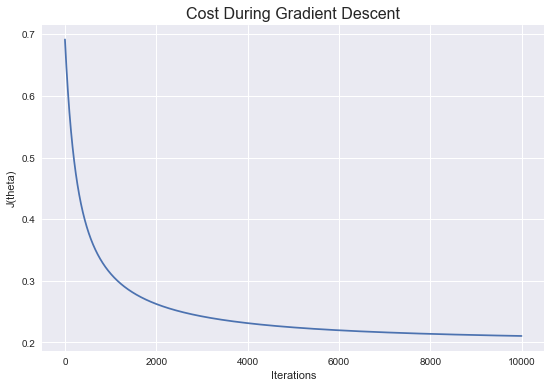

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(iters), costs)
plt.title('Cost During Gradient Descent', fontsize=16)
plt.xlabel('Iterations')
plt.ylabel('J(theta)')
plt.show()

In [15]:
output = predict(X_scaled, theta_vals)
accuracy = (y == output['preds']).mean()
admit_percent = output['preds'].mean()

print('Prediction accuracy:\n{}'.format(accuracy))
print('\nPredicted admission percentage:\n{}'.format(admit_percent))

Prediction accuracy:
0.89

Predicted admission percentage:
0.61


## Plot Decision Boundary

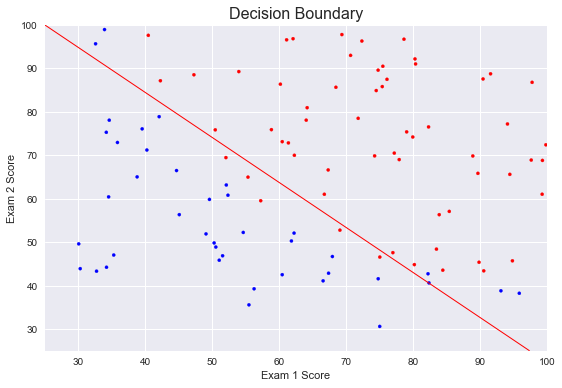

In [16]:
theta0_val_range = np.linspace(25,100,76)
theta1_val_range = np.linspace(25,100,76)
theta00, theta11 = np.meshgrid(theta0_val_range, theta1_val_range)
X_grid = np.column_stack((theta00.ravel(), theta11.ravel()))
grid_probs = scale_predict(X_grid, col_means, col_stdevs, theta_vals)['probs']

# Contour plot used to visually split predictions in half
fig, ax = plt.subplots(figsize=(9,6))
ax.contour(theta00, theta11, grid_probs.reshape(theta00.shape[0],-1), 1, colors='red', linewidths=1)
ax.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=10)
plt.xlim(25,100)
plt.ylim(25,100)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Decision Boundary', fontsize=16)
plt.show()

In [17]:
sample_student = np.array([[45, 85]])
scale_predict(sample_student, col_means, col_stdevs, theta_vals)

{'preds': array([1]), 'probs': array([0.70616485])}

# scikit-learn Implementation

For comparison, let's create a logistic regression classifier using scikit-learn and Pandas.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions

# Load dataset and split into X and y.
df = pd.read_csv(r'data/ex2data1.txt', names=['score1', 'score2', 'accepted'])
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

print(df.head())
print('\nColumn means:')
print(df.mean())

      score1     score2  accepted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

Column means:
score1      65.644274
score2      66.221998
accepted     0.600000
dtype: float64


## Data Pipeline

In [19]:
# Create pipeline to perform feature scaling, fit model, and predict values.
pipe = Pipeline([('sc', StandardScaler()),('lr', LogisticRegression())])
pipe.fit(X, y)
predicted_probs_train = pipe.predict_proba(X)
predictions_train = pipe.predict(X)
accuracy = accuracy_score(y, predictions_train)

print('Accuracy:', accuracy)

Accuracy: 0.89


## Additional Metrics

In [20]:
df_preds = pd.DataFrame()
df_preds['p_reject'] = predicted_probs_train[:,0]
df_preds['p_accept'] = predicted_probs_train[:,1]
df_preds['decision'] = predictions_train
df_preds['actual_decision'] = y

# Calculate sensitivity and specificity.
tp = df_preds[(df_preds['decision']==1) & (df_preds['actual_decision']==1)].shape[0]
fp = df_preds[(df_preds['decision']==1) & (df_preds['actual_decision']==0)].shape[0]
tn = df_preds[(df_preds['decision']==0) & (df_preds['actual_decision']==0)].shape[0]
fn = df_preds[(df_preds['decision']==0) & (df_preds['actual_decision']==1)].shape[0]

sensitivity = round(tp / (tp + fn), 2)
specificity = round(tn / (tn + fp), 2)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
df_preds.head(5)

Sensitivity: 0.92
Specificity: 0.85


,p_reject,p_accept,decision,actual_decision
0,0.799570,0.200430,0,0
1,0.996503,0.003497,0,0
2,0.859087,0.140913,0,0
3,0.077035,0.922965,1,1
4,0.030755,0.969245,1,1


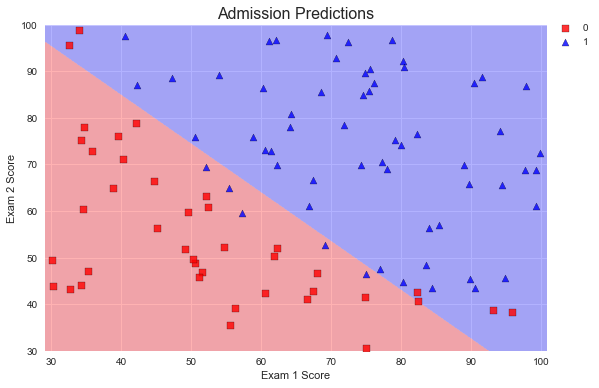

In [21]:
fig = plt.figure(figsize=(9,6))
plot_decision_regions(np.array(X), np.array(y), pipe)
plt.title('Admission Predictions', fontsize=16)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.ylim(30,100)
plt.legend(bbox_to_anchor=(1.1,1.03))
plt.show()